# Some K-Means Clustering Problems #
## and ##
# A Neural Network Problem #

## Problem 1 ##

This problem has to do with extending the k-Means clustering class (from [here](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)) which was discussed in class and is reproduced below.  The key method in the class is (as usual) ".fit()", which establishes centroids for each cluster and labels for each point in the data set--i.e., which cluster each point belongs to.

Your task in this problem will be to modify the class to produce additional output. 

**Note:** The k-means clustering algorithm is *not* guaranteed to converge, so you may not always get the outcome you expect.

In [78]:
import numpy as np
from numpy.linalg import norm


class Kmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
    
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

1. Consider the dataset 02-02prob1.csv with two feature variables and available on the github page. Produce a scatter plot of the data and visually estimate the number of clusters in the datset.

2. Consider the class Kmeans defined above, and in particular its ".fit()" method.  Some questions to answer:
+ What are the parameters for the class that can be changed on initialization?
+ What are the stopping criteria (note plural) for the method?
+ What are the three attributes that the method produces/updates?  Give a description of each.

3. The class is very general, and can work with clusters in arbitrary dimensions.  But, as written, the class consists primarily of internal methods and, once fitted, can only be used to predict which cluster a new value of the feature variables belongs to (using ".predict()").  Write a method  .print_centroids()for the class which returns the centroids.

4. Write another method .display_cluster() which (1) produces a scatterplot of the clusters with (2) the color of each point indicating the cluster it belongs to and (3) the centroids of each cluster also displayed in **black**.

5. The k-means clustering algorithm progresses by randomly choosing starting centroids from among the points and then alternatively labelling data points according to the nearest centroid and then updating the centroids to reflect these new clusters--repeating these two steps until a stopping criterion is met.  Write a method .display_fit() for the class which finds the clusters as in the ".fit()" method, but also produces a scatterplot like the one in the previous part *for each iteration* of the algorithm--the goal being to visually display how the cluster classification progresses as the algorithm progresses through each step. 

## Problem  2 ##

The k-means clustering algorithm assumes that the number $k$ of clusters is already known.  But for high-dimensional data, it may not be easy to determine $k$.  One technique for estimating the number of clusters (see p. 313 of the textbook) is the "elbow method".   

The idea is that the "SSE error", which gives the total sum of squares of distances from each point in the data to the centroid of its cluster (see the Class definition above), can be used to estimate the number of centers as follows: For each choice in a range of possible values of $k$, plot the SSE produced by the k-means algorithm for that $k$.  The actual number of clusters should be the $k$ which occurs at the 'elbow' of that plot.  Why?  Geometrically, if a centroid is located at the center of its actual cluster, it should be almost as small as possible. When points from other clusters are included in the cluster (e.g., when $k$ is too small), the SSE will be too big, because the centroid is associated with points that are too far away.  When $k$ is too big, the SSE will be smaller but not by much, since you are simply dividing clusters into smaller pieces and SSEs between the unneeded clusters won't be significantly different.  

See [this link](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) for a discussion of how this can be implemented with SKLearn.

**Your assignment:**

1. Consider the data set 02-02prob2.csv.  This is a blob of an unspecified number of clusters in 7-dimensional space.  Write a function elbow(n), which produces an elbow plot for the points (k,SSE(k)) for each k between 1 and n, and use it to estimate the number of clusters is my blob.  **The function should make use of the Kmeans class above**, which may need to be modified to produce the needed output.

**Note:** The number of clusters in the blob may not be well-defined.  I've used the SKLearn blob function to create clusters which, when plotted, clearly result in fewer clusters than I've specified.  Hence the nature of randomness!

## Problem 3 (Neural Network) ##

The goal on this problem is to use the Neural Network described in class and in Chapter 11 of the text to classify each of the 10 types of  objects of clothing in the Fashion-MNIST dataset.   Fashion-MNIST--and how to download it--was described in the 01-25-24assn.ipynb notebook [on the Github](https://github.com/aleahy-work/CS-STAT323-W24/tree/main).  The authors neural network was described in the 02-08-24class.ipynb notebook, in the neuralnet-implement.mp4 video posted [on the Classroom page](https://classroom.google.com/c/NjQ2NzA1MzI5OTgz), and in Chapter 11 of the textbook (pp. 347-360). (See 'Some Scikit-Learn Problems' in the Classroom page and 01-25-24assn.ipynb on the Github for the actual assignment.) The expectation is that you should be about to use notes from class or the textbook author's [Jupyter notebook for Chapter 11](https://github.com/rasbt/machine-learning-book/tree/main/ch11) with some minor modifications to load the Fashion-MNIST data, train the author's neural network, and test your model to see its accuracy.  Here are the steps in the problem:

1. Load the Fashion-MNIST **train** dataset.  Normalize the data for use in a neural network and set aside **6000** data points in the train dataset to create a validation set to test training during each epoch.

2. Import or copy-and-paste the author's NeuralNetMLP class and associated functions and create a model which instantiates his NeuralNetMLP class.  (You won't need to change the 'num_features' and 'num_classes' attributes, but you might want to experiment with the number 'num_hidden' of weights in the hidden layer.) Then **train** the model for 50 epochs using (mini-)batches of size 100, as the author did in his example. Depending on your computer, this may take a while, so have fun watching your training and validation accuracy increase with each epoch! **Question:** What is your training and validation accuracy on the last epoch?  (FWIW, mine came in around 88%--slightly lower than the MNIST example the author did.)

3. Evaluate your model's performance by producing plots of mean-squared-error and model accuracy, **and** load the MNIST-Fashion test dataset to see the final test accuracy.  (**Warning:** this is called 't10k', not 'test', in the dataset.  Also, remember to normalize your test data or your test accuracy will be significantly lower than your train and validation accuracy!)

# Key #

# Problem 1 #

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
myX = np.genfromtxt("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/02-02prob1.csv", delimiter=',')

In [12]:
myX[:5]

array([[-1.97407162,  0.3158997 ],
       [ 1.85979441,  6.35951086],
       [ 3.40341271,  6.05147589],
       [ 3.3115618 ,  4.93103311],
       [-6.14118783,  3.17116188]])

## Part 1 ##

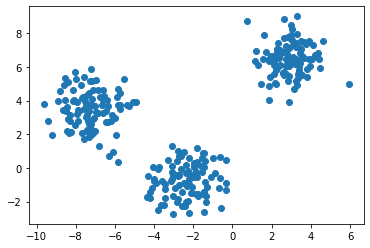

In [13]:
plt.scatter(myX[:,0], myX[:,1])
plt.show()

There are three clusters of data.

## Part 2 ##

+ The number of clusters and the number of iterations are chosen upon initialization by the user.

+ The .fit() method stops after 100 iterations or if the centroids do not move from one iteration to the next.

+ The fit method updates the centroids of each cluster, the labels attached to each point in the data set, and the sums of squares of errors.

## Part 3 ##

In [17]:
    def print_centroids(self):
        return self.centroids  # See full, modified class below

## Part 4 ##

In [36]:
    def display_cluster(self, X):
        plt.scatter(X[:,0], X[:,1], c = self.labels)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c = "black")
        plt.show()  # See full, modified class below

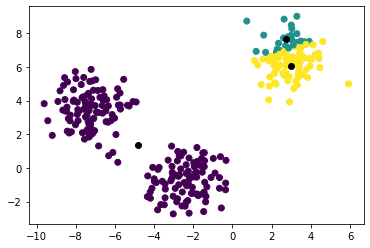

In [35]:
my3means.display_cluster(myX)

## Part 5 ##

In [46]:
    def display_fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            self.display_cluster(X)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
#
#  See the full, modified class below ALONG WITH EXAMPLE
#

In [41]:
import numpy as np
from numpy.linalg import norm


class myKmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
 
    def print_centroids(self):
        return self.centroids

    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

    def display_cluster(self, X):
        plt.scatter(X[:,0], X[:,1], c = self.labels)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c = "black")
        plt.show()
         
    def display_fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            self.display_cluster(X)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)

    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [42]:
my3means = myKmeans(n_clusters = 3)

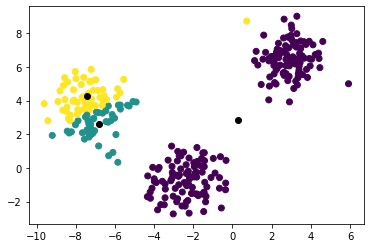

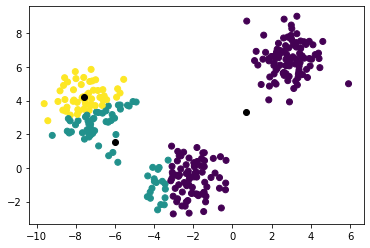

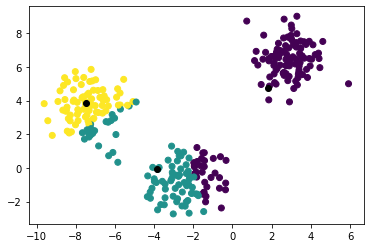

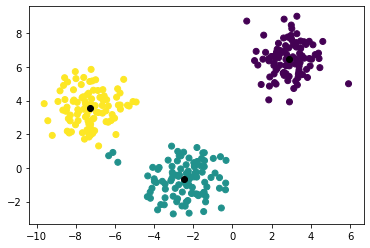

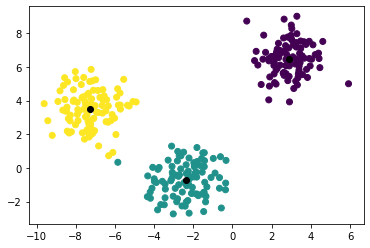

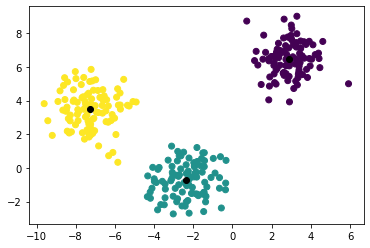

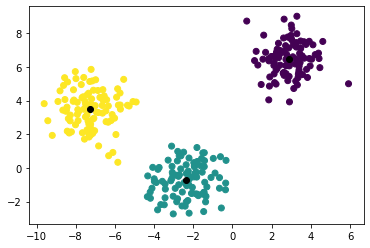

In [43]:
my3means.display_fit(myX)

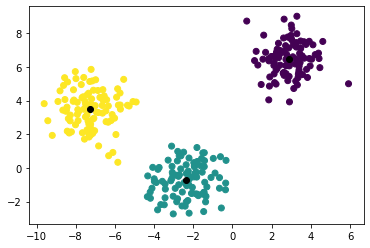

In [44]:
my3means.display_cluster(myX)

# Problem 2 #

## Part 1 ##

In [47]:
myX = np.genfromtxt("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/Assns/02-02prob2.csv", delimiter=',')

**Note:** This next cell modifies the class (mildly) so that the .fit() method returns self.error() which is the sums of squares of errors.  The elbow function will use this returned value as the y-value in a line plot of the SSE over a range of n_clusters to locate the "elbow" of the data. 

In [48]:
import numpy as np
from numpy.linalg import norm


class myKmeans:
    '''Implementing Kmeans algorithm.'''

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
 
    def print_centroids(self):
        return self.centroids
        
    def fit(self, X):
        self.centroids = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            self.error = self.compute_sse(X, self.labels, self.centroids)
            if np.all(old_centroids == self.centroids):
                break
        return self.error


    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [49]:
def elbow(n):
    myplot = []

    for i in range(1,10):
        mymeans = myKmeans(n_clusters = i)  # modified Kmeans class
        myerr = mymeans.fit(myX)
        myplot.append([i,myerr])
    mydata= np.array(myplot)
    plt.plot(mydata[:,0], mydata[:,1])
    plt.show()

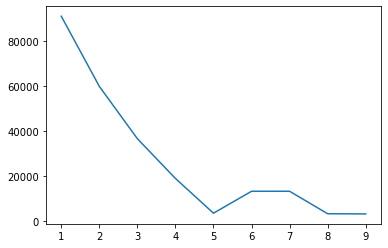

In [54]:
elbow(10)

There appear to be five or six clusters in the data (which was run several times for overall effect). 

# Problem 3 #

## Part 1: Load the Data ##

In [55]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [56]:
""" 
Assuming you downloaded the data to a folder called 'fashion-mnist', which is a
subfolder of the folder you are currently working with, you can load
the 'train' images and classes with the following function call.
"""
myX, myy = load_mnist('/home/employee/aleahy/CS323/Jupyter/Assns/fashion-mnist','train')

In [57]:
myX.shape  # This is one bigger than it should be

(60000, 784)

In [58]:
myX[:5]  

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [59]:
myy[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

**Normalize the data**

In [60]:
myX = ((myX / 255.) - .5) * 2  # Warning: Don't do this multiple times without thinking!!!

In [61]:
myX[:5]

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

**Note:** The test set already exists separately, but I will create a **validation** set to be used later.

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(myX, myy, test_size=6000)

In [64]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(54000, 784)
(6000, 784)
(54000,)
(6000,)


## Part 2: Create a Model ##

In [65]:
import numpy as np

In [66]:
##########################
### MODEL
##########################

def sigmoid(z):                                        
    return 1. / (1. + np.exp(-z))


def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary


class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
        
    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):  
    
        #########################
        ### Output layer weights
        #########################
        
        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        

        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

In [67]:
model = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

### Training the Model ###

#### Define some methods for loading the data in batches: ###

In [68]:
import numpy as np

num_epochs = 50
minibatch_size = 100


def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size 
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]

        
# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        X_train, y_train, minibatch_size)
    
    for X_train_mini, y_train_mini in minibatch_gen:

        break
        
    break
    
print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


#### Define some functions for computing the loss and accuracy ####

**Note:** These methods will largely be used for displaying the epoch-by-epoch outout and producing nice graphs for error and accuracy.

In [69]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets) 

#### Check the initial accuracy: ####

In [70]:
_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 8.5%


#### Define more functions for computing model accuracy: ####

In [71]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [72]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

Initial valid MSE: 0.3
Initial valid accuracy: 8.5%


**Question:** Why is this important?  See below!

#### Finally, actually train the model ####

In [73]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            
            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
        
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [74]:
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 72.04% | Valid Acc: 71.32%
Epoch: 002/050 | Train MSE: 0.04 | Train Acc: 76.71% | Valid Acc: 76.08%
Epoch: 003/050 | Train MSE: 0.03 | Train Acc: 79.66% | Valid Acc: 79.18%
Epoch: 004/050 | Train MSE: 0.03 | Train Acc: 81.37% | Valid Acc: 80.90%
Epoch: 005/050 | Train MSE: 0.03 | Train Acc: 82.26% | Valid Acc: 81.73%
Epoch: 006/050 | Train MSE: 0.03 | Train Acc: 83.05% | Valid Acc: 82.68%
Epoch: 007/050 | Train MSE: 0.03 | Train Acc: 83.56% | Valid Acc: 83.17%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 84.01% | Valid Acc: 83.40%
Epoch: 009/050 | Train MSE: 0.02 | Train Acc: 84.32% | Valid Acc: 84.03%
Epoch: 010/050 | Train MSE: 0.02 | Train Acc: 84.68% | Valid Acc: 84.15%
Epoch: 011/050 | Train MSE: 0.02 | Train Acc: 85.15% | Valid Acc: 84.48%
Epoch: 012/050 | Train MSE: 0.02 | Train Acc: 85.24% | Valid Acc: 85.00%
Epoch: 013/050 | Train MSE: 0.02 | Train Acc: 85.56% | Valid Acc: 85.05%
Epoch: 014/050 | Train MSE: 0.02 | Train Acc: 85.79

## Part 3: Evaluate Model Performance ##

In [75]:
import matplotlib.pyplot as plt

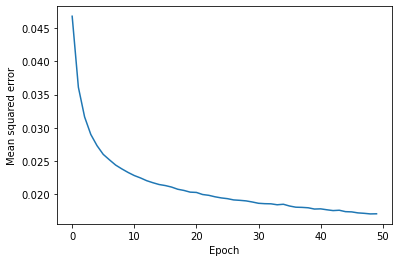

In [76]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
#plt.savefig('figures/11_07.png', dpi=300)
plt.show()

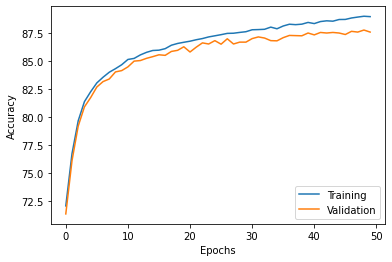

In [77]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.savefig('epochs.png')
plt.show()

### Final Accuracy Measure ###

In [79]:
mytestX, mytesty = load_mnist('/home/employee/aleahy/CS323/Jupyter/Assns/fashion-mnist','t10k')

In [80]:
mytestX.shape

(10000, 784)

In [81]:
mytesty.shape

(10000,)

In [85]:
mynormtestX = ((mytestX / 255.) - .5) * 2 

In [93]:
_, pred = model.forward(mynormtestX) # Note that forward produces both a_h and a_out

In [102]:
pred.shape  # Note the data is still in one-hot format, so we convert back for comparison with y

(10000, 10)

In [103]:
pred[:5]

array([[1.37716043e-04, 3.38801837e-03, 9.48546942e-04, 9.12547325e-04,
        6.04531649e-04, 1.29071372e-01, 2.11579959e-03, 9.56724049e-02,
        9.68936890e-03, 6.27575272e-01],
       [1.94565955e-03, 1.28409318e-03, 9.30706654e-01, 4.06375244e-04,
        1.52629355e-02, 4.01912122e-04, 2.69113273e-02, 3.81663491e-05,
        7.62887044e-03, 7.05325250e-04],
       [1.36546563e-02, 9.96538557e-01, 5.78675734e-03, 6.92763209e-03,
        1.12790758e-02, 3.16757205e-05, 2.97453159e-04, 4.48175431e-03,
        2.03981055e-04, 2.18541707e-03],
       [7.01190349e-03, 9.96856468e-01, 6.72094643e-03, 1.39712092e-02,
        7.43709037e-03, 1.03619948e-04, 3.02254523e-04, 2.03035945e-03,
        1.28031057e-04, 2.43844563e-03],
       [7.32761028e-02, 1.26536447e-03, 2.03587702e-02, 4.35926098e-03,
        1.33849056e-02, 3.18292447e-03, 7.92732863e-01, 4.90500327e-05,
        1.99751796e-03, 1.17762902e-03]])

In [104]:
np.argmax(pred, axis = 1)

array([9, 2, 1, ..., 8, 1, 5])

In [105]:
mytesty[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [100]:
from sklearn.metrics import accuracy_score

In [106]:
accuracy_score(np.argmax(pred, axis = 1), mytesty)

0.8641

**Conclusion:** We obtained 86.4% accuracy on the test data.